

---

---




# Treinamento de uma rede MLP para relação XOR - Tensorflow.keras

Este notebook aplica uma rede MLP para o problema XOR utilizando a função callback **ReduceLROnPlateau**.

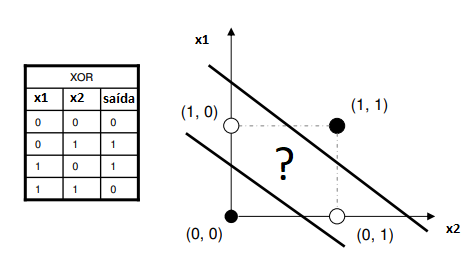




---

---





## Relação XOR (dados de entrada e saída) - carregamento dos dados



In [1]:
import numpy as np
# Dados de entrada
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]],
            dtype=np.float)
# Saídas XOR
y_XOR = np.array([0, 1, 1, 0])

## Cria e treina uma rede MLP - configuração mínima para o XOR

Cria e treina rede uma rede MLP com dois neurônios na camada escondida (intermediária):

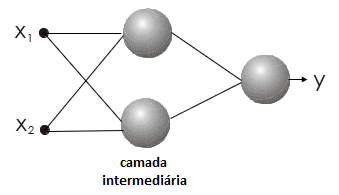





## Definição do modelo

In [2]:
from keras.models import Sequential
from keras.layers import Dense
# construção do modelo 
model = Sequential()
# adicionando camadas
model.add(Dense(2, activation='sigmoid', input_shape=(2,))) # camada oculta
model.add(Dense(1)) # camada de saída com 01 neurônio

## Compilação do modelo

In [3]:
from keras.optimizers import SGD
model.compile(optimizer=SGD(learning_rate=0.9), loss='mean_squared_error', 
              metrics=['accuracy'])

## Ajuste/treinamento do modelo

In [4]:
from keras.callbacks import ReduceLROnPlateau

rlrp = ReduceLROnPlateau(monitor = 'loss', factor = 0.8, patience = 50, verbose = 1)
history = model.fit(X, y_XOR, epochs=2000, batch_size=4, callbacks=[rlrp])

Epoch 1/2000
1/1 [==============================] - 1s 660ms/step - loss: 0.4454 - accuracy: 0.5000
Epoch 2/2000
1/1 [==============================] - 0s 7ms/step - loss: 1.0336 - accuracy: 0.5000
Epoch 3/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.9464 - accuracy: 0.5000
Epoch 4/2000
1/1 [==============================] - 0s 9ms/step - loss: 8.5614 - accuracy: 0.5000
Epoch 5/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.4567 - accuracy: 0.5000
Epoch 6/2000
1/1 [==============================] - 0s 3ms/step - loss: 6.9393 - accuracy: 0.5000
Epoch 7/2000
1/1 [==============================] - 0s 3ms/step - loss: 4.7634 - accuracy: 0.5000
Epoch 8/2000
1/1 [==============================] - 0s 4ms/step - loss: 3.3090 - accuracy: 0.5000
Epoch 9/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.2951 - accuracy: 0.5000
Epoch 10/2000
1/1 [==============================] - 0s 5ms/step - loss: 1.6214 - accuracy: 0.5000
Epoch 11/2000
1/1

## Avaliação do modelo

In [5]:
_, precisao = model.evaluate(X, y_XOR, verbose=0)
print("Precisão da classificação: %.1f%%"%(precisao*100))

Precisão da classificação: 100.0%


## Análise da função loss (erro/perda)

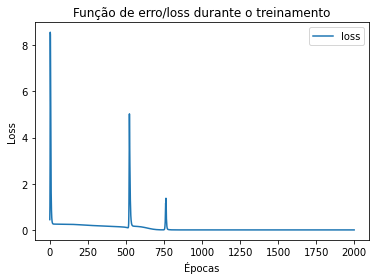

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel("Épocas")
plt.ylabel('Loss')
plt.title('Função de erro/loss durante o treinamento')
plt.legend(['loss'])
plt.show()

## Predição (teste da rede MLP treinada)


In [18]:
model.predict(X)
#print(np.around(model.predict(X),2))

array([[-4.8875809e-06],
       [ 9.9999666e-01],
       [ 9.9999392e-01],
       [-5.4836273e-06]], dtype=float32)